In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, gc, gzip, pickle, json
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [66]:
#prinf libraries versions
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)

numpy version:  1.24.4
pandas version:  1.4.4


In [67]:
#read data
INFO_COLUMNS = ['Participant_No', 'Condition', 'Segment','Time']
EMG_AMP_COLUMNS = ['Emg/Amplitude[RightOrbicularis]',
               'Emg/Amplitude[RightZygomaticus]',
               'Emg/Amplitude[RightFrontalis]',
               'Emg/Amplitude[CenterCorrugator]',
               'Emg/Amplitude[LeftFrontalis]',
               'Emg/Amplitude[LeftZygomaticus]',
               'Emg/Amplitude[LeftOrbicularis]']
EMG_CONTACT_COLUMNS = ['Emg/Contact[RightOrbicularis]',
               'Emg/Contact[RightZygomaticus]',
               'Emg/Contact[RightFrontalis]',
               'Emg/Contact[CenterCorrugator]',
               'Emg/Contact[LeftFrontalis]',
               'Emg/Contact[LeftZygomaticus]',
               'Emg/Contact[LeftOrbicularis]']
HR_COLUMNS = ['HeartRate/Average', 'Ppg/Raw.ppg']
IMU_COLUMNS = ['Accelerometer/Raw.x', 'Accelerometer/Raw.y', 'Accelerometer/Raw.z', 
               'Gyroscope/Raw.x', 'Gyroscope/Raw.y', 'Gyroscope/Raw.z']
EYE_COLUMNS = ['VerboseData.Right.PupilDiameterMm','VerboseData.Left.PupilDiameterMm']
BIOPAC_RR_COLUMNS = ['Biopac_RSP']
BIOPAC_GSR_COLUMNS = ['Biopac_GSR']
SENSOR_COLUMNS = EMG_AMP_COLUMNS + EMG_CONTACT_COLUMNS + HR_COLUMNS + IMU_COLUMNS + EYE_COLUMNS + BIOPAC_RR_COLUMNS + BIOPAC_GSR_COLUMNS

ALL_COLUMNS = INFO_COLUMNS + SENSOR_COLUMNS
SAMPLING_RATE = 10 #original sampling is 50, bu later we downsample to 10
data_folder = 'temp/synced_participant_data/'

In [68]:
df_emg_amp = pd.DataFrame()
df_emg_contact = pd.DataFrame()
df_hr = pd.DataFrame()
df_imu = pd.DataFrame()
df_eye = pd.DataFrame()
df_rr = pd.DataFrame()
df_gsr = pd.DataFrame()
df_all_sensor = pd.DataFrame() #all senosr data
df_info = pd.DataFrame() #all info data including labels

for file in os.listdir(data_folder):
    if file.endswith('.csv'):
        df = pd.read_csv(data_folder + file)
        #original sampling is 50, downsample to 10
        df = df.iloc[::5, :]
        df = df[ALL_COLUMNS]
        #dropna
        print('before dropna: ', df.shape)
        df = df.dropna()
        print('after dropna: ', df.shape)

        df_all_sensor = pd.concat([df_all_sensor, df[SENSOR_COLUMNS]])
        df_info = pd.concat([df_info, df[INFO_COLUMNS]])

        df_emg_amp = pd.concat([df_emg_amp, df[EMG_AMP_COLUMNS]])
        df_emg_contact = pd.concat([df_emg_contact, df[EMG_CONTACT_COLUMNS]])
        df_hr = pd.concat([df_hr, df[HR_COLUMNS]])
        df_imu = pd.concat([df_imu, df[IMU_COLUMNS]])
        df_eye = pd.concat([df_eye, df[EYE_COLUMNS]])
        df_rr = pd.concat([df_rr, df[BIOPAC_RR_COLUMNS]])
        df_gsr = pd.concat([df_gsr, df[BIOPAC_GSR_COLUMNS]])

        
        del df
        


before dropna:  (30666, 30)
after dropna:  (24923, 30)
before dropna:  (30509, 30)
after dropna:  (24915, 30)
before dropna:  (29955, 30)
after dropna:  (24924, 30)
before dropna:  (29875, 30)
after dropna:  (24923, 30)
before dropna:  (30094, 30)
after dropna:  (24922, 30)
before dropna:  (30416, 30)
after dropna:  (24924, 30)
before dropna:  (30265, 30)
after dropna:  (24924, 30)
before dropna:  (30098, 30)
after dropna:  (24924, 30)
before dropna:  (29045, 30)
after dropna:  (24922, 30)
before dropna:  (29391, 30)
after dropna:  (24924, 30)
before dropna:  (29893, 30)
after dropna:  (24924, 30)
before dropna:  (30050, 30)
after dropna:  (24923, 30)
before dropna:  (31300, 30)
after dropna:  (24923, 30)
before dropna:  (29078, 30)
after dropna:  (24923, 30)
before dropna:  (29943, 30)
after dropna:  (24921, 30)
before dropna:  (29311, 30)
after dropna:  (24923, 30)
before dropna:  (30697, 30)
after dropna:  (24924, 30)
before dropna:  (30901, 30)
after dropna:  (24923, 30)
before dro

In [69]:
df_all_sensor = df_all_sensor.reset_index(drop=True)
df_info = df_info.reset_index(drop=True)


df_emg_amp = df_emg_amp.reset_index(drop=True)
df_emg_contact = df_emg_contact.reset_index(drop=True)
df_hr = df_hr.reset_index(drop=True)
df_imu = df_imu.reset_index(drop=True)
df_eye = df_eye.reset_index(drop=True)
df_rr = df_rr.reset_index(drop=True)
df_gsr = df_gsr.reset_index(drop=True)



df_all_sensor.shape, df_info.shape, df_emg_amp.shape, df_emg_contact.shape, df_hr.shape, df_imu.shape, df_eye.shape, df_rr.shape, df_gsr.shape

((1129903, 26),
 (1129903, 4),
 (1129903, 7),
 (1129903, 7),
 (1129903, 2),
 (1129903, 6),
 (1129903, 2),
 (1129903, 1),
 (1129903, 1))

In [73]:
#print(df_all_sensor.isnull().sum())
df_all_sensor.describe().T

,count,mean,std,min,25%,50%,75%,max
Emg/Amplitude[RightOrbicularis],1129903.0,0.000003,0.000004,7.549922e-07,0.000002,0.000002,0.000003,0.000289
Emg/Amplitude[RightZygomaticus],1129903.0,0.000003,0.000004,0.000000e+00,0.000002,0.000002,0.000003,0.000210
Emg/Amplitude[RightFrontalis],1129903.0,0.000005,0.000004,1.192093e-06,0.000002,0.000003,0.000006,0.000220
Emg/Amplitude[CenterCorrugator],1129903.0,0.000003,0.000003,9.934107e-07,0.000002,0.000002,0.000003,0.000807
Emg/Amplitude[LeftFrontalis],1129903.0,0.000005,0.000005,1.033147e-06,0.000002,0.000004,0.000006,0.000724
Emg/Amplitude[LeftZygomaticus],1129903.0,0.000003,0.000004,8.344650e-07,0.000002,0.000002,0.000004,0.000215
Emg/Amplitude[LeftOrbicularis],1129903.0,0.000003,0.000005,7.947286e-07,0.000002,0.000003,0.000004,0.000333
Emg/Contact[RightOrbicularis],1129903.0,9148.259313,1723.287572,5.872000e+03,8092.000000,8762.000000,9624.000000,21764.000000
Emg/Contact[RightZygomaticus],1129903.0,6581.011625,7665.388839,0.000000e+00,5208.000000,6018.000000,6904.000000,131070.000000
Emg/Contact[RightFrontalis],1129903.0,8297.253019,2479.168878,4.044000e+03,6652.000000,7938.000000,9480.000000,70384.000000


In [75]:
#scale data using 99th percentile as max and 1st percentile as min. remove values outside this range
def scale_data(df):
    df = df.clip(lower=df.quantile(0.01), upper=df.quantile(0.99), axis=1)
    df = (df - df.min()) / (df.max() - df.min())
    return df

df_all_sensor = scale_data(df_all_sensor)
df_emg_amp = scale_data(df_emg_amp)
df_emg_contact = scale_data(df_emg_contact)
df_hr = scale_data(df_hr)
df_imu = scale_data(df_imu)
df_eye = scale_data(df_eye)
df_rr = scale_data(df_rr)
df_gsr = scale_data(df_gsr)

df_all_sensor.describe().T


,count,mean,std,min,25%,50%,75%,max
Emg/Amplitude[RightOrbicularis],1129903.0,0.116625,0.156825,0.0,0.031785,0.063570,0.129584,1.0
Emg/Amplitude[RightZygomaticus],1129903.0,0.140629,0.159977,0.0,0.043478,0.090062,0.173913,1.0
Emg/Amplitude[RightFrontalis],1129903.0,0.179863,0.186521,0.0,0.045802,0.111959,0.254453,1.0
Emg/Amplitude[CenterCorrugator],1129903.0,0.143155,0.161140,0.0,0.044280,0.088561,0.184502,1.0
Emg/Amplitude[LeftFrontalis],1129903.0,0.170206,0.172686,0.0,0.043668,0.115721,0.246725,1.0
Emg/Amplitude[LeftZygomaticus],1129903.0,0.158785,0.170931,0.0,0.047945,0.095890,0.215753,1.0
Emg/Amplitude[LeftOrbicularis],1129903.0,0.127356,0.151950,0.0,0.038560,0.079692,0.159383,1.0
Emg/Contact[RightOrbicularis],1129903.0,0.335046,0.185574,0.0,0.218785,0.293345,0.389272,1.0
Emg/Contact[RightZygomaticus],1129903.0,0.412591,0.212199,0.0,0.254115,0.393004,0.544925,1.0
Emg/Contact[RightFrontalis],1129903.0,0.220565,0.157650,0.0,0.115242,0.197667,0.296500,1.0


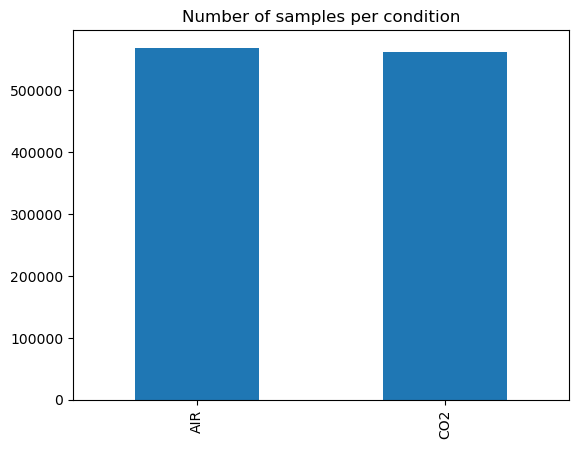

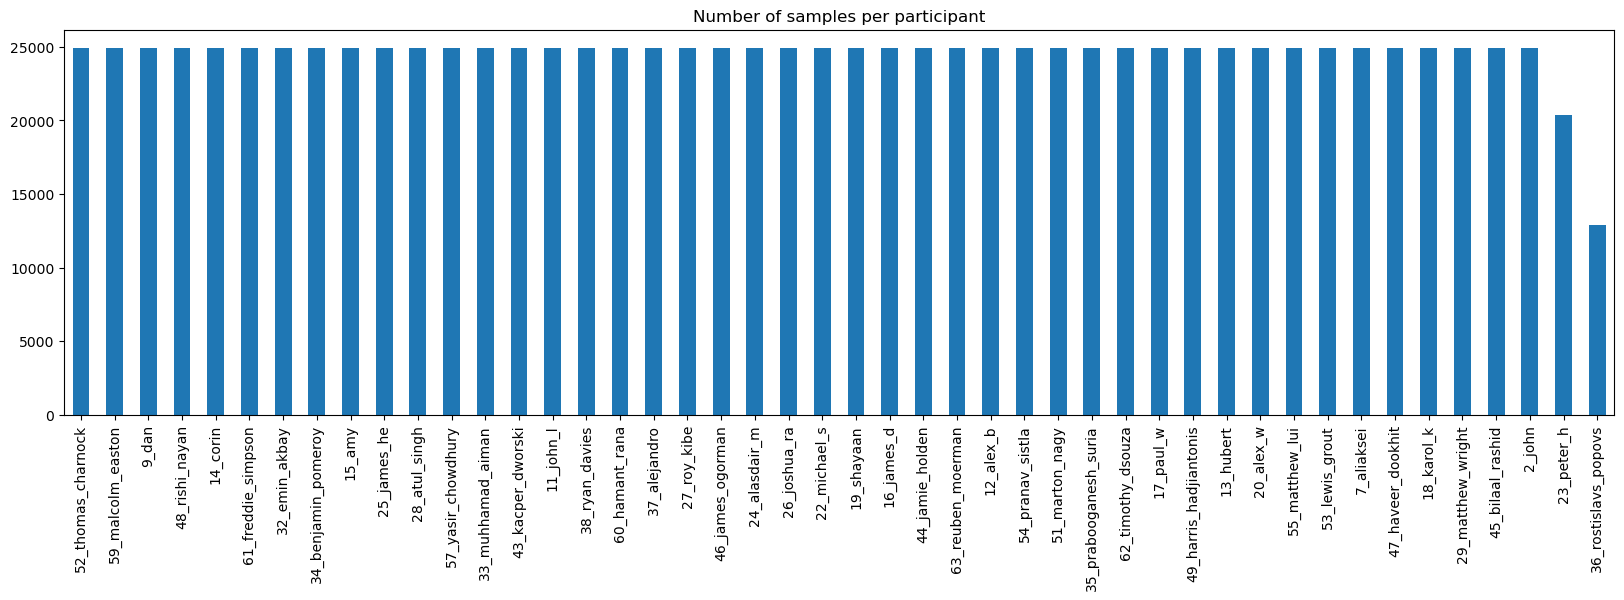

In [76]:
df_info.Condition.value_counts().plot(kind='bar')
plt.title('Number of samples per condition')
plt.show()

plt.figure(figsize=(20, 5))
df_info.Participant_No.value_counts().plot(kind='bar')
plt.title('Number of samples per participant')
plt.show()


In [77]:
#sliding window segmentation
WINDOW_SIZE_SECONDS = 30
WINDOW_SIZE = WINDOW_SIZE_SECONDS * SAMPLING_RATE
STEP_SIZE = (WINDOW_SIZE_SECONDS//6) * SAMPLING_RATE #get prediction every 5 seconds
#perform segmentation for each user and each condition
segments_all_sensor_dict = {}
segments_emg_amp_dict = {}
segments_emg_contact_dict = {}
segments_hr_dict = {}
segments_imu_dict = {}
segments_eye_dict = {}
segments_rr_dict = {}
segments_gsr_dict = {}
segments_labels_dict = {}

for user in df_info.Participant_No.unique():
    user_segments_all_sensor = []
    user_segments_emg_amp_sensor = []
    user_segments_emg_contact_sensor = []
    user_segments_hr_sensor = []
    user_segments_imu_sensor = []
    user_segments_eye_sensor = []
    user_segments_rr_sensor = []
    user_segments_gsr_sensor = []
    user_labels = []
    for condition in df_info.Condition.unique():
        user_cond_all_sensor_df = df_all_sensor[(df_info.Participant_No == user) & (df_info.Condition == condition)]
        user_cond_emg_amp_df = user_cond_all_sensor_df[EMG_AMP_COLUMNS]
        user_cond_emg_contact_df = user_cond_all_sensor_df[EMG_CONTACT_COLUMNS]
        user_cond_hr_df = user_cond_all_sensor_df[HR_COLUMNS]
        user_cond_imu_df = user_cond_all_sensor_df[IMU_COLUMNS]
        user_cond_eye_df = user_cond_all_sensor_df[EYE_COLUMNS]
        user_cond_rr_df = user_cond_all_sensor_df[BIOPAC_RR_COLUMNS]
        user_cond_gsr_df = user_cond_all_sensor_df[BIOPAC_GSR_COLUMNS]
        user_cond_info_df = df_info[(df_info.Participant_No == user) & (df_info.Condition == condition)]
        
        for i in range(0, len(user_cond_all_sensor_df) - WINDOW_SIZE, STEP_SIZE):
            user_segments_all_sensor.append(user_cond_all_sensor_df.iloc[i:i+WINDOW_SIZE, :].values)
            user_segments_emg_amp_sensor.append(user_cond_emg_amp_df.iloc[i:i+WINDOW_SIZE, :].values)
            user_segments_emg_contact_sensor.append(user_cond_emg_contact_df.iloc[i:i+WINDOW_SIZE, :].values)
            user_segments_hr_sensor.append(user_cond_hr_df.iloc[i:i+WINDOW_SIZE, :].values)
            user_segments_imu_sensor.append(user_cond_imu_df.iloc[i:i+WINDOW_SIZE, :].values)
            user_segments_eye_sensor.append(user_cond_eye_df.iloc[i:i+WINDOW_SIZE, :].values)
            user_segments_rr_sensor.append(user_cond_rr_df.iloc[i:i+WINDOW_SIZE, :].values)
            user_segments_gsr_sensor.append(user_cond_gsr_df.iloc[i:i+WINDOW_SIZE, :].values)
            user_labels.append(user_cond_info_df.Condition.iloc[i:i+WINDOW_SIZE].values)
            
    segments_all_sensor_dict[user] = user_segments_all_sensor
    
    segments_emg_amp_dict[user] = user_segments_emg_amp_sensor
    segments_emg_contact_dict[user] = user_segments_emg_contact_sensor
    segments_hr_dict[user] = user_segments_hr_sensor
    segments_imu_dict[user] = user_segments_imu_sensor
    segments_eye_dict[user] = user_segments_eye_sensor
    segments_rr_dict[user] = user_segments_rr_sensor
    segments_gsr_dict[user] = user_segments_gsr_sensor
    
    segments_labels_dict[user] = user_labels
    #print segments and labels shape
    print('user {} segments shape: '.format(user), np.array(user_segments_all_sensor).shape)
    print('user {} labels shape: '.format(user), np.array(user_labels).shape)
    print()

del df_all_sensor, df_info


user 63_reuben_moerman segments shape:  (488, 300, 26)
user 63_reuben_moerman labels shape:  (488, 300)

user 2_john segments shape:  (488, 300, 26)
user 2_john labels shape:  (488, 300)

user 27_roy_kibe segments shape:  (488, 300, 26)
user 27_roy_kibe labels shape:  (488, 300)

user 35_prabooganesh_suria segments shape:  (488, 300, 26)
user 35_prabooganesh_suria labels shape:  (488, 300)

user 47_haveer_dookhit segments shape:  (488, 300, 26)
user 47_haveer_dookhit labels shape:  (488, 300)

user 37_alejandro segments shape:  (488, 300, 26)
user 37_alejandro labels shape:  (488, 300)

user 60_hamant_rana segments shape:  (488, 300, 26)
user 60_hamant_rana labels shape:  (488, 300)

user 38_ryan_davies segments shape:  (488, 300, 26)
user 38_ryan_davies labels shape:  (488, 300)

user 7_aliaksei segments shape:  (488, 300, 26)
user 7_aliaksei labels shape:  (488, 300)

user 11_john_l segments shape:  (488, 300, 26)
user 11_john_l labels shape:  (488, 300)

user 43_kacper_dworski segme

In [78]:
#get a list of all users
users = list(segments_all_sensor_dict.keys())
print(len(users))
   

46


In [79]:
# Create temp notebook folder if it does not exist
TEMP_FOLDER = 'temp/6_end_to_end_preprocess_data'
if(not os.path.exists(TEMP_FOLDER)):
    os.mkdir(TEMP_FOLDER)


In [80]:
#save segments and labels
with gzip.open(os.path.join(TEMP_FOLDER, 'segments_all_sensor_dict.pkl.gz'), 'wb') as f:
    pickle.dump(segments_all_sensor_dict , f)

with gzip.open(os.path.join(TEMP_FOLDER, 'segments_emg_amp_dict.pkl.gz'), 'wb') as f:
    pickle.dump(segments_emg_amp_dict , f)

with gzip.open(os.path.join(TEMP_FOLDER, 'segments_emg_contact_dict.pkl.gz'), 'wb') as f:
    pickle.dump(segments_emg_contact_dict , f)

with gzip.open(os.path.join(TEMP_FOLDER, 'segments_hr_dict.pkl.gz'), 'wb') as f:
    pickle.dump(segments_hr_dict , f)

with gzip.open(os.path.join(TEMP_FOLDER, 'segments_imu_dict.pkl.gz'), 'wb') as f:
    pickle.dump(segments_imu_dict , f)

with gzip.open(os.path.join(TEMP_FOLDER, 'segments_eye_dict.pkl.gz'), 'wb') as f:
    pickle.dump(segments_eye_dict , f)

with gzip.open(os.path.join(TEMP_FOLDER, 'segments_rr_dict.pkl.gz'), 'wb') as f:
    pickle.dump(segments_rr_dict , f)

with gzip.open(os.path.join(TEMP_FOLDER, 'segments_gsr_dict.pkl.gz'), 'wb') as f:
    pickle.dump(segments_gsr_dict , f)
    
with gzip.open(os.path.join(TEMP_FOLDER, 'segments_labels_dict.pkl.gz'), 'wb') as f:
    pickle.dump(segments_labels_dict, f)


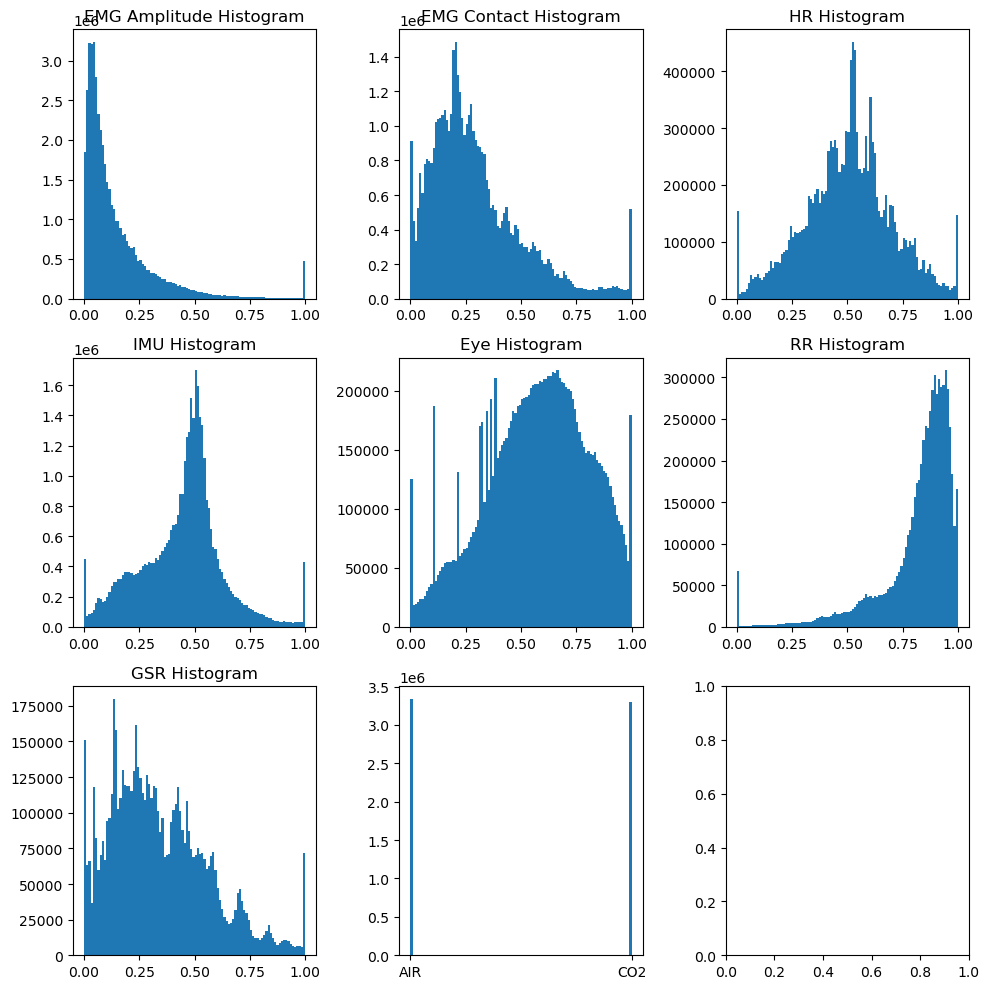

In [81]:
#plot value distribution histogram for each sensor for all users
#combine the plots into one
#use a grid of 3 x 3

fig, axs = plt.subplots(3, 3, figsize=(10, 10))
#flatten the sensor dict
segments_emg_amp_flat = [item for sublist in list(segments_emg_amp_dict.values()) for item in sublist]
segments_emg_contact_flat = [item for sublist in list(segments_emg_contact_dict.values()) for item in sublist]
segments_hr_flat = [item for sublist in list(segments_hr_dict.values()) for item in sublist]
segments_imu_flat = [item for sublist in list(segments_imu_dict.values()) for item in sublist]
segments_eye_flat = [item for sublist in list(segments_eye_dict.values()) for item in sublist]
segments_rr_flat = [item for sublist in list(segments_rr_dict.values()) for item in sublist]
segments_gsr_flat = [item for sublist in list(segments_gsr_dict.values()) for item in sublist]
segments_labels_flat = [item for sublist in list(segments_labels_dict.values()) for item in sublist]

axs[0, 0].hist(np.array(segments_emg_amp_flat).flatten(), bins=100)
axs[0, 0].set_title('EMG Amplitude Histogram')
axs[0, 1].hist(np.array(segments_emg_contact_flat).flatten(), bins=100)
axs[0, 1].set_title('EMG Contact Histogram')
axs[0, 2].hist(np.array(segments_hr_flat).flatten(), bins=100)
axs[0, 2].set_title('HR Histogram')
axs[1, 0].hist(np.array(segments_imu_flat).flatten(), bins=100)
axs[1, 0].set_title('IMU Histogram')
axs[1, 1].hist(np.array(segments_eye_flat).flatten(), bins=100)
axs[1, 1].set_title('Eye Histogram')
axs[1, 2].hist(np.array(segments_rr_flat).flatten(), bins=100)
axs[1, 2].set_title('RR Histogram')
axs[2, 0].hist(np.array(segments_gsr_flat).flatten(), bins=100)
axs[2, 0].set_title('GSR Histogram')
#plot also labels
axs[2, 1].hist(np.array(segments_labels_flat).flatten(), bins=100)

plt.tight_layout()
plt.show()


